# Laboratorio 2.1: Clasificación

Felipe Bravo, Hernán Sarmiento, Gabriel Iturra, María José Zambrano

Abril 2023


## Nombres

* Diego Ignacio Faúndez Ortega
* Javier Ignacio Kauer Lara

## Instrucciones

1. Trabajen en equipos de dos personas. Salvo excepciones, no se corregirá entregas con menos de dos integrantes.

2. Modifique este archivo `.ipynb` agregando sus respuestas donde corresponda.

3. El formato de entrega para esta actividad es un archivo **html**. Genere un archivo HTML usando jupyter (ver tutorial 2) y súbalo a U-Cursos. Basta con que **uno de los integrantes haga la entrega**. Si ambos hacen una entrega en U-Cursos, se revisará cualquiera de éstas.


## Estructura del laboratorio

Este laboratorio está conformado por preguntas teóricas de temas vistos en clases y preguntas prácticas (donde se requiere completar código) intercaladas con preguntas de interpretación de resultados y análisis. 

## Teoría


### Pregunta 1

Verdadero o Falso (si la afirmación es falsa justifique):

1. Si se quieren predecir las clases en un dataset que está desbalanceado es útil aplicar técnicas de subsampling u oversampling sobre todo el conjunto de datos.

**Respuesta:** 
Verdadero (con respecto a si es útil).

2. La división del dataset en un conjunto de train y en otro de testing permite la generalización de los resultados del modelo.

**Respuesta:**
Verdadero.

3. La clasificación es un método de aprendizaje supervisado porque en la construcción de los modelos se deben configurar hiperparámetros.

**Respuesta:**
Falso. Esto porque aunque la clasificación sea un método de aprendizaje supervisado, esto no es debido a que se tienen que configurar hiperparámetros, sino porque el usario supervisa que el modelo obtenido tenga una aplicación en la vida real, es decir que se obtenga un output.


## Parte práctica


A continuación vamos a cargar un dataset con noticias, el cual se puede encontrar en: https://www.kaggle.com/datasets/kevinmorgado/spanish-news-classification.

Los atributos que posee son:

- URL : El link a la noticia
- News: El texto de la noticia
- Type: La clasificación de la noticia


Para el laboratorio solo nos importan las columnas News y Type.


In [1]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/mzambrano1/Datasets-CC5205-otono-2023/master/lab2.1/noticias.csv")
df = df[["news", "Type"]]
df = df.rename(columns={
    'news': 'Noticia', 'Type':'Clasificación'})
df.head()


,Noticia,Clasificación
0,Durante el foro La banca articulador empresari...,Otra
1,El regulador de valores de China dijo el domin...,Regulaciones
2,En una industria históricamente masculina como...,Alianzas
3,Con el dato de marzo el IPC interanual encaden...,Macroeconomia
4,Ayer en Cartagena se dio inicio a la versión n...,Otra


A continuación preprocesaremos los textos y los convertiremos en vectores. Esto con el propósito de tener información numérica que pueda ser interpretable por los modelos que crearemos después.


In [2]:
import requests
import re
import string
from sklearn.feature_extraction.text import CountVectorizer

def remove_numbers(text):
    text = re.sub(r"[0-9]", " ", text)
    return " ".join(text.split())


def remove_unprintable_(text):
    printable = set(string.printable + "ñáéíóúü" + "ÑÁÉÍÓÚÜ")
    text = "".join(filter(lambda x: x in printable, text))
    return text

def remove_punctuation(text):
    pattern = re.compile(r"[^\w\sáéíóúüñÁÉÍÓÚÜÑ]")
    t = pattern.sub(r" ", text)
    return re.sub(" +", " ", t)


def reduce_spam(text):
    text = re.sub(r"(\w+)(\s+\1){2,}", r"\1", text)
    text = re.sub(r"(\w+\s+\w+)(\s+\1){2,}", r"\1", text)
    return text


def remove_vowels_accents(text):
    return (
        text.replace("á", "a")
        .replace("é", "e")
        .replace("í", "i")
        .replace("ó", "o")
        .replace("ú", "u")
        .replace("ü", "u")
    )

def remove_stopwords(text, stopwords_list):
    return " ".join(
        [word for word in str(text).split() if word not in stopwords_list]
    )

url = "https://raw.githubusercontent.com/Alir3z4/stop-words/master/spanish.txt"
r = requests.get(url)

stopwords_list = r.text.splitlines()

def preprocesar(text):
    text = text.lower()
    text = remove_numbers(text)
    text = remove_unprintable_(text)
    text = remove_punctuation(text)
    text = reduce_spam(text)
    text = remove_stopwords(text, stopwords_list)
    text = remove_vowels_accents(text)
    return text.strip()


# Extraer los vectores
vectorizer = CountVectorizer(preprocessor=preprocesar, min_df=2)
vectors = vectorizer.fit_transform(df["Noticia"])

# Incorporar los vectores como dataframe
X = pd.DataFrame(vectors.toarray(), columns=vectorizer.get_feature_names_out())
y = df["Clasificación"]

df_vectorizado = pd.concat([y, X], axis=1)
df_vectorizado.head()


,Clasificación,aa,aaa,abacum,abajo,abandonar,abandono,abanico,abaratamiento,abaratar,...,zero,zhao,zijin,zmvm,zona,zonas,zuckerberg,zug,zuluaga,zurich
0,Otra,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Regulaciones,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Alianzas,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Macroeconomia,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Otra,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Pregunta 3

Cargue los datos e indique lo siguiente:

- Tamaño del dataset vectorizado (cantidad de instancias y atributos).
- ¿Cuántas clases hay en la columna "Clasificación" y cuáles son sus nombres?
- ¿Cuántas instancias hay en cada clase?

Indique en cada caso cómo obtuvo la respuesta, es decir, adjunte código.


In [3]:
print(df_vectorizado.shape)
print(df_vectorizado["Clasificación"].unique())
print(len(df_vectorizado[df_vectorizado["Clasificación"] == "Otra"]))
print(len(df_vectorizado[df_vectorizado["Clasificación"] == "Regulaciones"]))
print(len(df_vectorizado[df_vectorizado["Clasificación"] == "Alianzas"]))
print(len(df_vectorizado[df_vectorizado["Clasificación"] == "Macroeconomia"]))
print(len(df_vectorizado[df_vectorizado["Clasificación"] == "Innovacion"]))
print(len(df_vectorizado[df_vectorizado["Clasificación"] == "Sostenibilidad"]))
print(len(df_vectorizado[df_vectorizado["Clasificación"] == "Reputacion"]))

(1217, 14407)
['Otra' 'Regulaciones' 'Alianzas' 'Macroeconomia' 'Innovacion'
 'Sostenibilidad' 'Reputacion']
130
142
247
340
195
137
26


Respuesta: 
El tamaño del dataset vectorizado es: 1217 instancias, y 14407 atributos.
En la columna de "Clasificación" hay 7 clases, con sus nombres siendo: 'Otra', 'Regulaciones', 'Alianzas', 'Macroeconomia', 'Innovacion', 'Sostenibilidad', y 'Reputacion', y estas tienen 130, 142, 247, 340, 195, 137, y 26 instancias respectivamente.

### Pregunta 4


En esta parte useremos el clasificador **Decision Tree**. Veremos distintas formas de usarlo, y vamos a compararlas utilizando diversas métricas.


Usando el siguiente código, entrenaremos un clasificador con los datos cargados (X, y) y haremos una predicción sobre los mismos datos empleando dicho clasificador entrenado. Luego, se mostrarán las métricas de **accuracy**, **precision**, **recall** y **f1-score**.


In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

clf = DecisionTreeClassifier()
clf.fit(X, y)
y_pred = clf.predict(X)
print("Accuracy:", accuracy_score(y, y_pred))
print(classification_report(y, y_pred))

Accuracy: 0.9967132292522597
                precision    recall  f1-score   support

      Alianzas       0.99      1.00      0.99       247
    Innovacion       1.00      1.00      1.00       195
 Macroeconomia       1.00      1.00      1.00       340
          Otra       1.00      0.98      0.99       130
  Regulaciones       1.00      0.99      1.00       142
    Reputacion       1.00      1.00      1.00        26
Sostenibilidad       1.00      0.99      1.00       137

      accuracy                           1.00      1217
     macro avg       1.00      1.00      1.00      1217
  weighted avg       1.00      1.00      1.00      1217



De acuerdo a los resultados obtenidos:

- ¿Qué opina sobre las predicciones?
- ¿Qué problema puede identificar?


**Respuesta:**

Según los valores obtenidos, se puede decir que el clasificador Decision Tree genera un modelo demasiado preciso. Este problema ocurre porque el modelo fue evaluado con los mismo datos con que fue entrenado, por lo que fue una evaluación "perfecta" ya que el modelo ya conocía los datos con exactitud. Esto se conoce como overfitting.

### Pregunta 5.1


Ahora lo que haremos será dividir nuestro dataset en 70% entrenar (**_training set_**) y 30% para testear (**_testing set_**). Use la función **_train_test_split()_** de _sklearn_ y utilice las variables `X_train, X_test, y_train, y_test`.


Escriba el código necesario para dividir los datos, entrenar el modelo e indicar el **accuracy**, **precision** y **recall** del clasificador.

Entrene usando el **_training set_** y pruebe sobre el **_testing set_**, en base a la división 70%-30%, respectivamente

**NOTA: para dividir el dataset use el parámetro `stratify=y`.**


In [5]:
# Recuerde usar las variables X_train, X_test, y_train, y_test
# Código de lo pedido

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.30, random_state=37, stratify=y)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7759562841530054
                precision    recall  f1-score   support

      Alianzas       0.81      0.82      0.82        74
    Innovacion       0.77      0.73      0.75        59
 Macroeconomia       0.82      0.87      0.84       102
          Otra       0.71      0.64      0.68        39
  Regulaciones       0.71      0.70      0.71        43
    Reputacion       1.00      0.88      0.93         8
Sostenibilidad       0.69      0.71      0.70        41

      accuracy                           0.78       366
     macro avg       0.79      0.76      0.77       366
  weighted avg       0.78      0.78      0.77       366



### Pregunta 5.2.

Según el resultado obtenido en la pregunta anterior, responda lo siguiente:

1. ¿Cuál clasificador tiene peores resultados? ¿Por qué?
2. ¿Cuál de las dos formas de entrenar el clasificador prefiere? Justifique su respuesta


**Respuesta:**

1- El peor resultado debería ser obtenido mediante la segunda forma ya que, a pesar de tener los indicadores de precisión más "honestos" sigue siendo un clasificador entrenado con menos datos que el anterior (70%). Esto podría verse mejor si se analizan datos diferentes a los que se usaron para entrenar ambos clasificadores. El primero tendría métricas mejores.

2- A pesar de lo dicho en la pregunta 5.2.1, es preferible utilizar la segunda forma de entrenamiento para el clasificador en caso de no tener datos adicionales para testear, ya que permite saber con mayor precisión cual sería el desempeño esperado del clasificador y no tener un modelo "a ciegas" del que no se sepan sus metricas.

### Pregunta 6

El siguiente código genera una matriz de confusión de los resultados de clasificación de la pregunta anterior. Ejecute el bloque completo para visualizar el gráfico. Interprete la matriz y comente sobre cada uno de los valores distintos de 0 en la matriz y describa lo que representa.

_Verifique que los resultados que se imprimen concuerden con su respuesta (por el factor aleatorio del estimador). Nota: Para obtener un comportamiento determinista existe el parámetro **random_state**, por ejemplo: clf = DecisionTreeClassifier(random_state=2)._


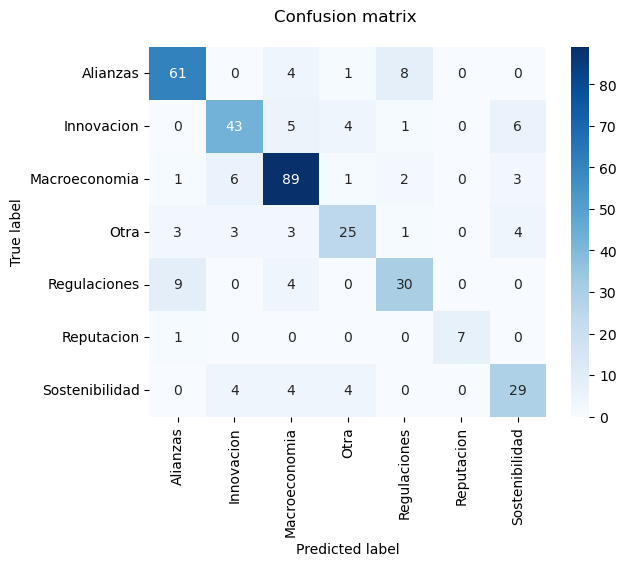

In [6]:
# EJECUTAR ESTE BLOQUE
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

# Compute confusion matrix. By default is not normalized (normalize=None)
# If necessary change 'y_pred' according to your variable name
cm = confusion_matrix(y_test, y_pred)

# Only use the labels that appear in the data
classes = unique_labels(y_test, y_pred)

df = pd.DataFrame(cm, index=classes, columns=classes)

g = sns.heatmap(df, annot=True, cmap="Blues")
g.set_yticklabels(g.get_yticklabels(), rotation=0)

plt.title('Confusion matrix \n')
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.autoscale()


**Respuesta:**

Se puede ver que la diagonal descendiente representa a los verdaderos positivos. Por otro lado, los valores que están de forma horizontal y no son los verdaderos positivos, representan los falsos negativos. Por el contrario, los valores que están de forma vertical y no son verdaderos positivos, representan a los falsos positivos. Además, si se dividen los verdaderos positivos por el total de su fila se obtiene el recall, y si se dividen por el total de su columna se obtiene la precision.

### Pregunta 7

Para este clasificador utilizaremos Cross-validation. Con cross-validation, el conjunto de entrenamiento se divide en $k$ conjuntos disjuntos; se entrena sobre los datos correspondientes a $k-1$ de éstos, y se evalúa sobre el conjunto restante. Esto se repite $k$ veces, evaluando siempre sobre un conjunto distinto. Teniendo en cuenta el parámetro $k$, a éste método se le llama $k$-fold cross-validation.

El código que está a continuación realizará 10-fold cross-validation usando Decision Tree sobre los datos. La forma de estimar el rendimiento del clasificador es, entre otras cosas, calculando el promedio de todos los k-folds.

Además se muestra la predición sobre los datos para testear.


In [7]:
# EJECUTAR ESTE BLOQUE

from sklearn.model_selection import cross_validate
import numpy as np

scoring = ['precision_macro', 'recall_macro', 'accuracy', 'f1_macro']
cv_results = cross_validate(
    clf, X, y, cv=10, scoring=scoring, return_train_score=True)

print('Promedio Precision:', np.mean(cv_results['test_precision_macro']))
print('Promedio Recall:', np.mean(cv_results['test_recall_macro']))
print('Promedio F1-score:', np.mean(cv_results['test_f1_macro']))
print('Promedio Accucary:', np.mean(cv_results['test_accuracy']))

# Si quisieramos mostrar el resultado de cada k-fold, deberiamos quitar la
# funcion np.mean la cual retorna el promedio. Esto mostraría una lista con el resultado de cada fold


Promedio Precision: 0.8001377087903144
Promedio Recall: 0.7662882254116222
Promedio F1-score: 0.7716748540381734
Promedio Accucary: 0.7871697601950955


- Compare los valores de las métricas con respecto a lo obtenido en la pregunta 5. Comente en qué difieren y por qué.
- ¿Qué beneficios tiene emplear cross-validation?



**Respuesta:**
La precisión se vuelve un poco más alta (0.78 -> 0.8)

El recall baja un poco(0.79 -> 0.78)

El f1-score se mantiene (0.79)

El accuracy sube (0.78 -> 0.79)

Esto se debe a que el metodo de cross validation utiliza k-1 conjuntos diferentes de datos para entrenar, lo que genera metricas distintas para cada uno de los fold-cross validation y que finalmente se promedian para dar las métricas finales. Es importante notar como los resultados no varían mucho con respecto a las métricas anteriores ya que básicamente se utilizan los mismos datos.

Este método tiene el beneficio de que el modelo se entrena y testea más de una vez, lo que en teoría debería permitir generar un modelo más preciso y útil.
